In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_excel('UAS_SVM.xlsx')
df.head()

,Customer ID,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri,Pelunasan Kredit
0,1234561427,3,5,3,1,2,4,2,2,1
1,1234561518,2,5,1,2,3,5,1,5,0
2,1234561282,2,3,3,2,5,3,4,1,1
3,1234561064,2,4,4,3,2,2,4,2,0
4,1234561043,5,5,4,5,2,1,4,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Customer ID       999 non-null    int64
 1   Age               999 non-null    int64
 2   Income            999 non-null    int64
 3   Education         999 non-null    int64
 4   Occupation        999 non-null    int64
 5   Income.1          999 non-null    int64
 6   Average Balance   999 non-null    int64
 7   Appraisal         999 non-null    int64
 8   Industri          999 non-null    int64
 9   Pelunasan Kredit  999 non-null    int64
dtypes: int64(10)
memory usage: 78.2 KB


In [4]:
df.isnull().sum()

Customer ID         0
Age                 0
Income              0
Education           0
Occupation          0
Income.1            0
Average Balance     0
Appraisal           0
Industri            0
Pelunasan Kredit    0
dtype: int64

In [5]:
df.shape

(999, 10)

In [6]:
X = df.drop(['Customer ID', 'Pelunasan Kredit'], axis=1)
y = df['Pelunasan Kredit']

X.head()

,Age,Income,Education,Occupation,Income.1,Average Balance,Appraisal,Industri
0,3,5,3,1,2,4,2,2
1,2,5,1,2,3,5,1,5
2,2,3,3,2,5,3,4,1
3,2,4,4,3,2,2,4,2
4,5,5,4,5,2,1,4,1


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Pelunasan Kredit, dtype: int64

<AxesSubplot:>

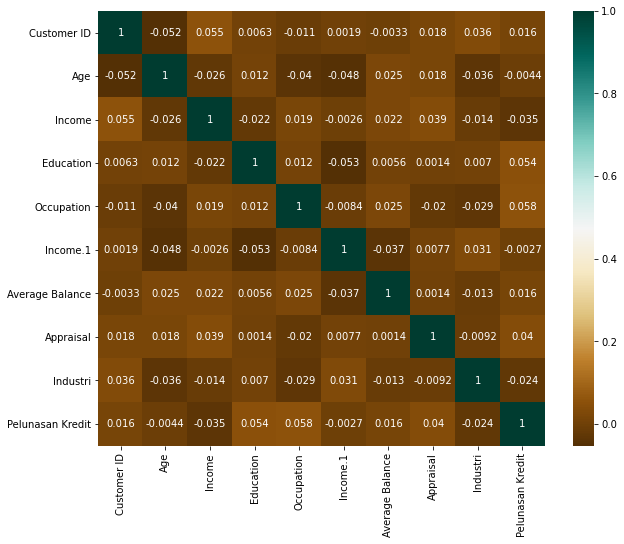

In [8]:
c = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(c,cmap='BrBG',annot=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [12]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [13]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.28      0.36       243
           1       0.53      0.77      0.63       257

    accuracy                           0.53       500
   macro avg       0.53      0.53      0.50       500
weighted avg       0.53      0.53      0.50       500

